# 1 Import necessary Python Packages

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 2. Preparing train and test data 

In [12]:
# load model  breast cancer data
data = load_breast_cancer()
X = data['data']
y = data['target']

In [13]:
X.shape

(569, 30)

In [14]:
y.shape

(569,)

Let’s have a look at the distribution of positive and negative class i.e. breast cancer and not a breast cancer cases.

([<matplotlib.patches.Wedge at 0x2c092396de0>,
 [Text(0.4286547905679233, 1.0130424820920245, '0'),
  Text(-0.42865446047676137, -1.0130426217654303, '1')],
 [Text(0.23381170394613998, 0.5525686265956496, '37%'),
  Text(-0.23381152389641527, -0.5525687027811438, '63%')])

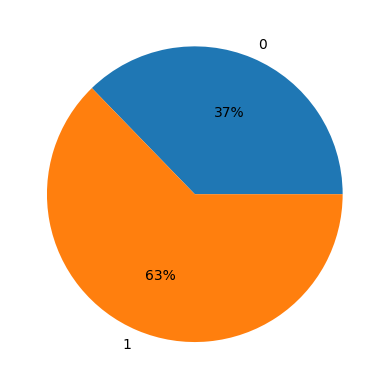

In [15]:
import numpy as np
unique , counts = np.unique(y , return_counts = True)
plt.pie(counts , labels = unique , autopct ='%.0f%%')

Split the data into train and test set using the train_test_split method from sklearn’s model_selection module.

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)


# Step 3: Model Training

Training data is parsed as arguments to GaussianNB() to initiate the model training. The fitted model object is then used to get the predictions in the form of probability on the train and the test dataset. 

In [17]:
# Model Training
# Fit a Naive Bayes Model
clf = GaussianNB().fit(X_train , y_train)

# Step 4: Generating Predictions

Generate prediction probabilities using training and testing dataset which would be used to get Precision and Recall at different values of the threshold.

In [18]:
# Genrating Predictions
# Predict Probabability
y_prob_train = clf.predict_proba(X_train)[:,1]
y_prob_test = clf.predict_proba(X_test)[:,1]

The Precision_Recall_curve() method takes two inputs – the probabilities from train dataset i.e. y_prob_train and the actual ground truth values, and returns three values namely Precision, Recall, and thresholds.

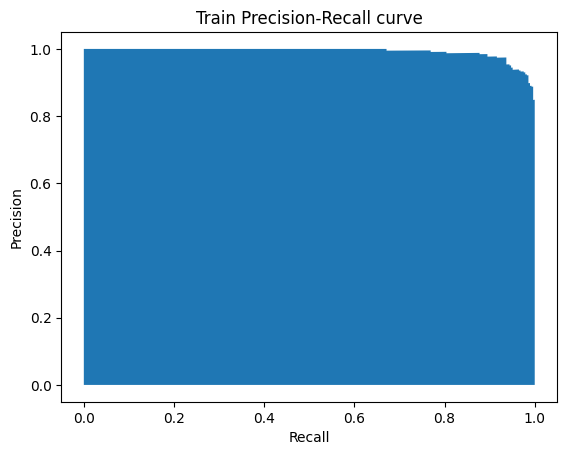

In [22]:
# Plotting PR Curve
precision, recall, thresholds = precision_recall_curve(y_train, y_prob_train)
plt.fill_between(recall, precision )
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");